<a href="https://colab.research.google.com/github/NishilJ/CS-4372-ML-DS/blob/main/CS4372_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
url = "https://archive.ics.uci.edu/static/public/275/data.csv"
df = pd.read_csv(url)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


<Figure size 1200x500 with 0 Axes>

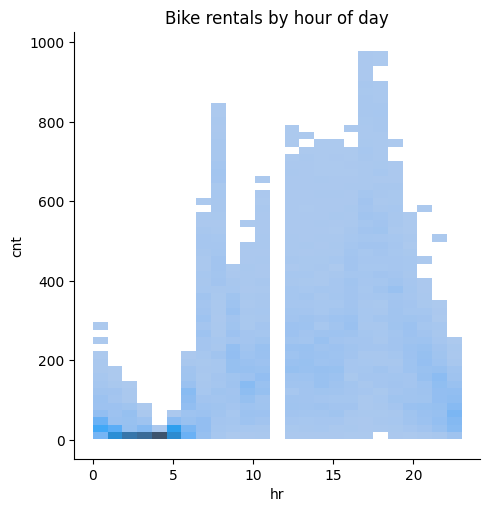

<Figure size 800x500 with 0 Axes>

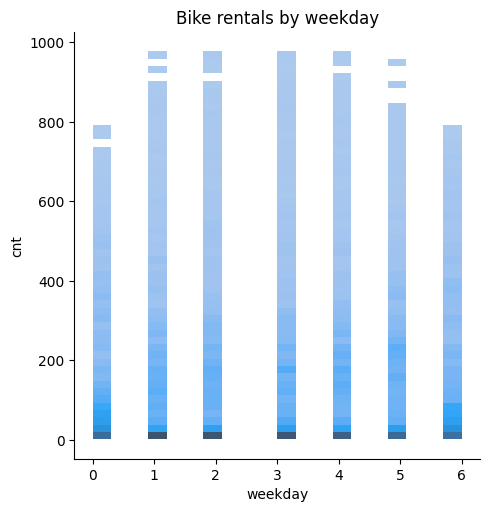

In [ ]:
plt.figure(figsize=(12,5))
sns.displot(x="hr", y="cnt", data=df)
plt.title("Bike rentals by hour of day")
plt.show()

plt.figure(figsize=(8,5))
sns.displot(x="weekday", y="cnt", data=df)
plt.title("Bike rentals by weekday")
plt.show()

<Figure size 800x500 with 0 Axes>

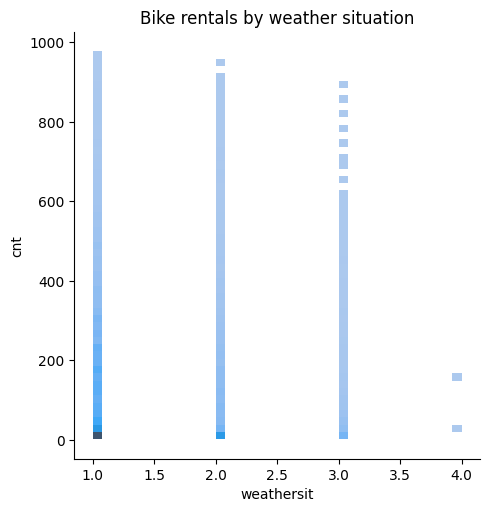

<Figure size 800x500 with 0 Axes>

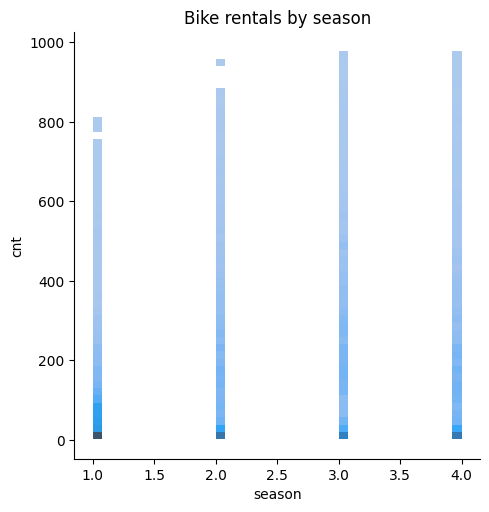

In [ ]:
plt.figure(figsize=(8,5))
sns.displot(x="weathersit", y="cnt", data=df)
plt.title("Bike rentals by weather situation")
plt.show()

plt.figure(figsize=(8,5))
sns.displot(x="season", y="cnt", data=df)
plt.title("Bike rentals by season")
plt.show()

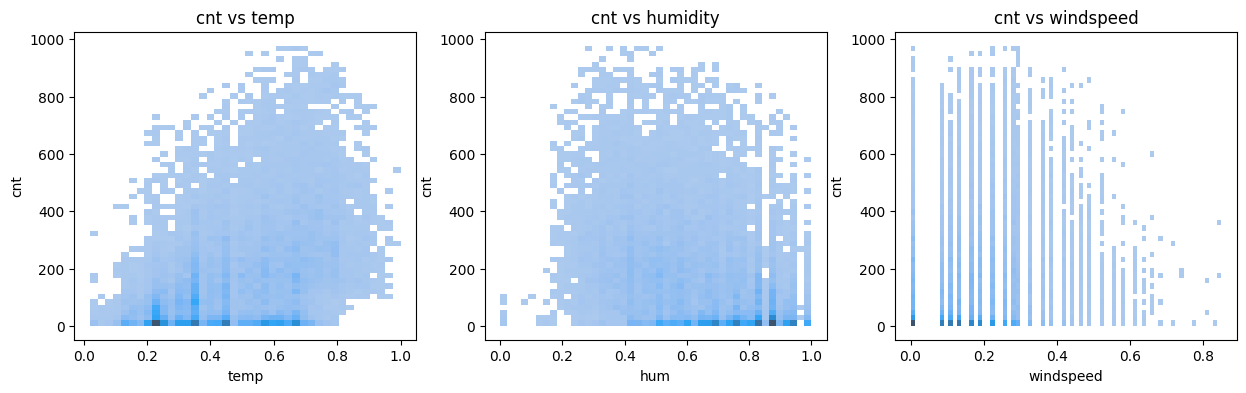

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
sns.histplot(x='temp', y='cnt', data=df, ax=axes[0])
sns.histplot(x='hum', y='cnt', data=df, ax=axes[1])
sns.histplot(x='windspeed', y='cnt', data=df, ax=axes[2])
axes[0].set_title("cnt vs temp")
axes[1].set_title("cnt vs humidity")
axes[2].set_title("cnt vs windspeed")
plt.show()

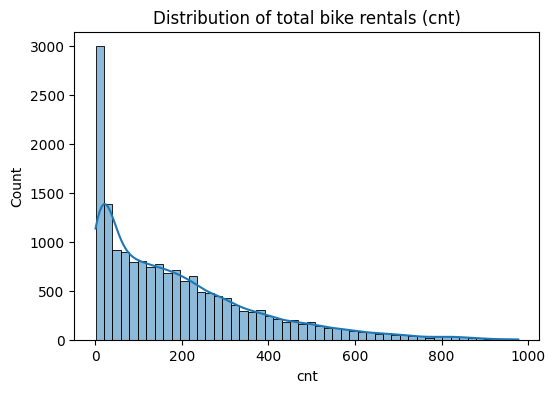

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['cnt'], bins=50, kde=True)
plt.title("Distribution of total bike rentals (cnt)")
plt.show()

In [ ]:
# Uniform Distribution
df['cnt'] = np.log(df['cnt'])

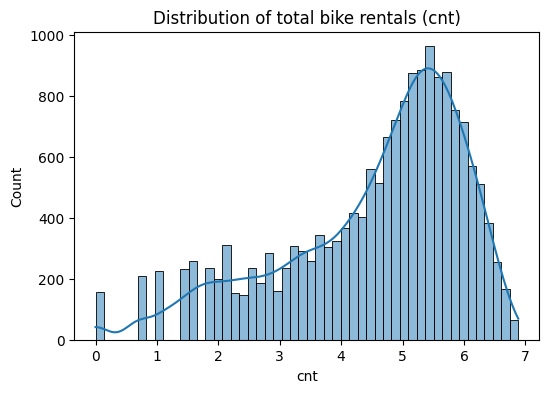

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['cnt'], bins=50, kde=True)
plt.title("Distribution of total bike rentals (cnt)")
plt.show()

In [ ]:
# Drop id columns or columns directly related to target
df = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])

In [ ]:
# One hot encoding for season, year and weather
df_enc = pd.get_dummies(df, columns=['season', 'weathersit'], drop_first=True, dtype=int)

# Cyclical encoding for month (1–12)
df_enc["mnth_sin"] = np.sin(2 * np.pi * df_enc["mnth"] / 12)
df_enc["mnth_cos"] = np.cos(2 * np.pi * df_enc["mnth"] / 12)

# Cyclical encoding for hr (0–23)
df_enc["hr_sin"] = np.sin(2 * np.pi * df_enc["hr"] / 24)
df_enc["hr_cos"] = np.cos(2 * np.pi * df_enc["hr"] / 24)

# Cyclical encoding for weekday (0–6)
df_enc["weekday_sin"] = np.sin(2 * np.pi * df_enc["weekday"] / 7)
df_enc["weekday_cos"] = np.cos(2 * np.pi * df_enc["weekday"] / 7)

# Drop the original columns
df_enc = df_enc.drop(columns=["mnth", "hr", "weekday"])

# Move target variable 'count' to the last column
cols = [c for c in df_enc.columns if c != "cnt"] + ["cnt"]
df_enc = df_enc[cols]

display(df_enc.head())

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,weathersit_2,weathersit_3,weathersit_4,mnth_sin,mnth_cos,hr_sin,hr_cos,weekday_sin,weekday_cos,cnt
0,0,0,0,0.24,0.2879,0.81,0.0,0,0,0,0,0,0,0.5,0.866025,0.000000,1.000000,-0.781831,0.62349,2.772589
1,0,0,0,0.22,0.2727,0.80,0.0,0,0,0,0,0,0,0.5,0.866025,0.258819,0.965926,-0.781831,0.62349,3.688879
2,0,0,0,0.22,0.2727,0.80,0.0,0,0,0,0,0,0,0.5,0.866025,0.500000,0.866025,-0.781831,0.62349,3.465736
3,0,0,0,0.24,0.2879,0.75,0.0,0,0,0,0,0,0,0.5,0.866025,0.707107,0.707107,-0.781831,0.62349,2.564949
4,0,0,0,0.24,0.2879,0.75,0.0,0,0,0,0,0,0,0.5,0.866025,0.866025,0.500000,-0.781831,0.62349,0.000000


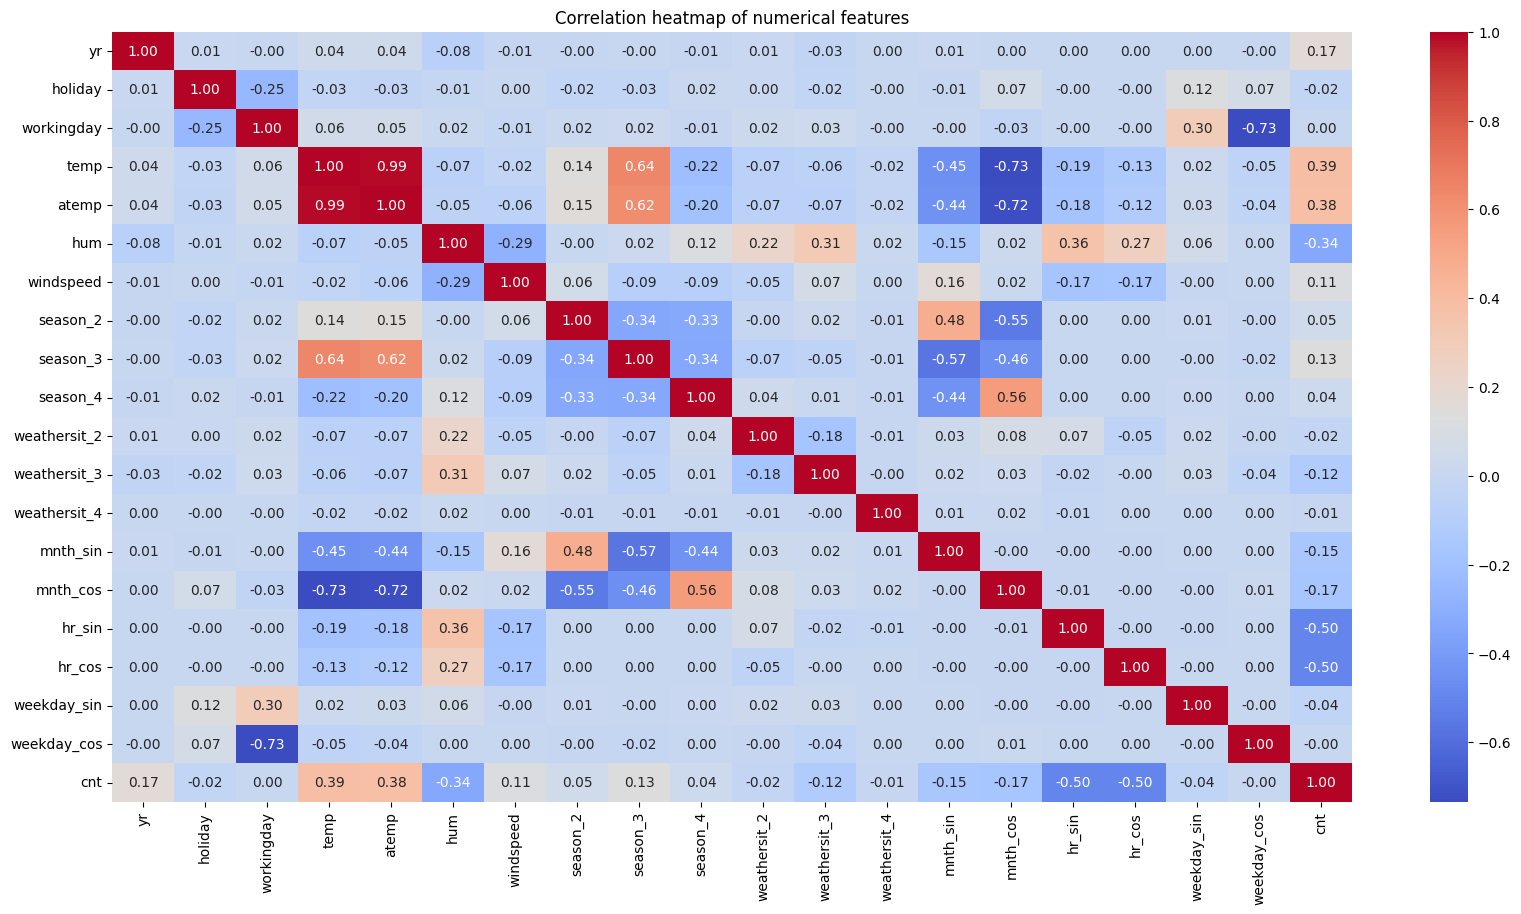

In [ ]:
plt.figure(figsize=(20,10))
# Calculate correlation only for numerical features
sns.heatmap(df_enc.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation heatmap of numerical features")
plt.show()

In [ ]:
# Select all columns except 'cnt', 'dteday', and 'instant' as features (X)
# 'instant' and 'dteday' are identifiers/date strings and not suitable for scaling.
X = df_enc.drop(['cnt'], axis=1)

# Select 'cnt' as the target (y)
y = df_enc['cnt']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,weathersit_2,weathersit_3,weathersit_4,mnth_sin,mnth_cos,hr_sin,hr_cos,weekday_sin,weekday_cos
count,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04
mean,2.682065e-16,-4.170284e-17,5.233297e-17,1.569989e-16,-1.831654e-16,-3.074562e-16,1.537281e-16,2.616649e-17,-1.962486e-17,3.924973e-17,-3.597892e-17,3.904530e-17,3.679662e-18,3.434351e-17,2.616649e-17,2.381559e-17,3.117491e-17,1.126385e-16,7.441094e-17
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00
min,-1.005134e+00,-1.721122e-01,-1.466900e+00,-2.477205e+00,-2.768625e+00,-3.251166e+00,-1.553889e+00,-5.830423e-01,-5.907512e-01,-5.673610e-01,-5.950058e-01,-2.981774e-01,-1.313971e-02,-1.409761e+00,-1.401833e+00,-1.408462e+00,-1.408902e+00,-1.375081e+00,-1.278032e+00
25%,-1.005134e+00,-1.721122e-01,-1.466900e+00,-8.153035e-01,-8.290895e-01,-7.631431e-01,-6.996886e-01,-5.830423e-01,-5.907512e-01,-5.673610e-01,-5.950058e-01,-2.981774e-01,-1.313971e-02,-1.219838e+00,-1.212802e+00,-9.940645e-01,-9.948588e-01,-1.101806e+00,-1.278032e+00
50%,9.948919e-01,-1.721122e-01,6.817098e-01,1.564696e-02,5.251758e-02,1.436398e-02,3.189880e-02,-5.830423e-01,-5.907512e-01,-5.673610e-01,-5.950058e-01,-2.981774e-01,-1.313971e-02,7.844733e-03,9.114271e-03,6.378975e-03,4.729852e-03,4.658976e-03,-3.192234e-01
75%,9.948919e-01,-1.721122e-01,6.817098e-01,8.465975e-01,8.462549e-01,7.918711e-01,5.198962e-01,1.715141e+00,1.692760e+00,-5.673610e-01,1.680656e+00,-2.981774e-01,-1.313971e-02,7.166474e-01,1.231031e+00,1.006822e+00,1.004318e+00,1.111124e+00,8.763912e-01
max,9.948919e-01,5.810164e+00,6.817098e-01,2.612367e+00,3.050563e+00,1.932215e+00,5.399871e+00,1.715141e+00,1.692760e+00,1.762546e+00,1.680656e+00,3.353708e+00,7.610519e+01,1.425450e+00,1.420062e+00,1.421220e+00,1.418362e+00,1.384399e+00,1.408490e+00


In [ ]:
# Select features from the scaled DataFrame
features = ['temp', 'hum', "yr", "weathersit_3", "mnth_sin",  "mnth_cos", "hr_sin", "hr_cos", 'season_3']
X = X_scaled[features]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(random_state=42)
sgd.fit(X_train, y_train)

SGDRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
y_pred = sgd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Explained Variance Score:", ev)
print("R-squared Score:", r2)

Mean Squared Error: 0.863880725322009
Mean Absolute Error: 0.7229753534287567
Explained Variance Score: 0.6006397437303772
R-squared Score: 0.6006349906866958


In [ ]:
from scipy.stats import uniform, loguniform

param_dist = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': loguniform(1e-4, 1e-1),
    'l1_ratio': uniform(0, 1),
    'learning_rate': ['invscaling', 'constant', 'adaptive'],
    'eta0': loguniform(1e-2, 1e0)
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=sgd,
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   cv=5,
                                   random_state=42)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SGDRegressor(random_state=42), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cc413d4f2f0>,
                                        'eta0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cc4067786b0>,
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cc4078c8230>,
                                        'learning_rate': ['invscaling',
                                                          'constant',
                                                          'adaptive'],
                                        'loss': ['squared_error', 'huber',
                                                 'epsilon_insensitive',
                                                 'squared_epsilon_insensitive'],
                                        'penalty': ['l2', 'l1', 'elasticnet']},
                   random_state=42)

In [ ]:
best_sgd_model = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'alpha': np.float64(0.00017776785559910646), 'eta0': np.float64(0.01525486239612155), 'l1_ratio': np.float64(0.602440925901119), 'learning_rate': 'adaptive', 'loss': 'squared_error', 'penalty': 'l2'}


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
y_pred = random_search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Explained Variance Score:", ev)
print("R-squared Score:", r2)

Mean Squared Error: 0.8635768811753564
Mean Absolute Error: 0.7271151290639716
Explained Variance Score: 0.6007766612158265
R-squared Score: 0.600775455356066


# OLS

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [ ]:
mod = sm.OLS(y_train, X_train)

In [ ]:
res = mod.fit()

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     2435.
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        04:44:18   Log-Likelihood:                -18689.
No. Observations:               13903   AIC:                         3.740e+04
Df Residuals:                   13893   BIC:                         3.747e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.5358      0.008    576.077   

In [ ]:
y_test_predict = res.predict(X_test)

In [ ]:
sm.tools.eval_measures.rmse(y_test, y_test_predict)

np.float64(0.929315574293027)